In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os

In [2]:
def to_nlst(t):
    return list(filter(lambda x: x not in ['[', ']', ',', '\'', ' '], str(t)))

In [3]:
def combine(a0, a1):
    def unfinised(n):
        return isinstance(n, list) or isinstance(n, tuple)
    
    if unfinised(a0):
        if a1 == ')':
            lp, num = a0
            assert lp == '('
            return num
        else:
            num, op = a0
            try:
                return eval(''.join([str(num),op,str(a1)]))
            except:
                return -1
    else:
        return (a0, a1)      

In [4]:
# simplified
def shift_reduce(nlst, sdlst):
    N = 0
    max_nmem = 0
    mem = []
    mem.append((nlst[0],  sdlst[0]))

    for n, sd in zip(nlst[1:], sdlst[1:]+[10000]):
        while sd > mem[-1][1]:
            a0, sd0 = mem.pop()
            n = combine(a0, n)
            if len(mem) == 0:
                break
        mem.append((n, sd))
        if len(mem) > max_nmem:
            max_nmem = len(mem)
                
    assert len(mem) == 1
    return float(mem[0][0]), max_nmem

In [46]:
ftrain = 'train_d30.parenthesis.tsv'
samples = []
with open(ftrain, 'r') as f:
    for line in f:
        expr, ds, h, lbl = line.strip().split('\t')
        samples.append((expr, ds.split(), h, lbl))

In [47]:
samples[0]

('( 9 )', ['1', '2'], '2', '9')

In [17]:
ftrain = 'test_d30.pn1.more.tsv'
samples = []
with open(ftrain, 'r') as f:
    for line in f:
        expr, ds, h, lbl = line.strip().split('\t')
        expr = expr.split()
        ds = ds.split()
        ds = list(map(int, ds))
        samples.append((expr, ds, h, lbl))
        mmc = shift_reduce(expr, ds)[1]
        if mmc == 2:
            print(expr)

['4', '-', '(', '1', ')']
['(', '7', '*', '1', '-', '5', ')']
['(', '3', '/', '6', ')', '/', '(', '3', ')', '/', '(', '3', ')', '*', '7']
['6', '+', '(', '4', ')']
['(', '6', '/', '3', ')']
['(', '7', ')', '-', '8', '/', '4', '/', '9']
['4', '+', '(', '5', ')']
['4', '/', '(', '3', ')', '*', '(', '6', ')', '/', '2']
['5', '*', '(', '4', ')']
['(', '5', '*', '3', '/', '5', '+', '9', '+', '4', ')', '*', '9', '/', '7', '/', '4', '/', '9', '/', '3']
['1', '-', '(', '7', ')']
['8', '*', '(', '9', ')']
['(', '1', '/', '9', ')', '+', '(', '7', ')', '*', '1']
['(', '9', '-', '3', ')']
['(', '7', ')', '-', '7', '*', '2', '+', '(', '5', ')']
['9', '+', '(', '4', ')']
['(', '1', ')', '/', '(', '8', ')']
['3', '*', '(', '7', ')']
['2', '/', '(', '6', ')', '/', '(', '1', ')']
['7', '/', '2', '*', '4', '/', '(', '9', ')']
['4', '*', '(', '3', ')']
['1', '*', '(', '3', ')']
['3', '-', '(', '3', ')']
['(', '3', '*', '1', '/', '8', '/', '8', '/', '6', '+', '3', ')', '*', '6', '*', '2', '/', '5', '/', '

['(', '8', ')', '/', '(', '7', ')']
['(', '7', '-', '4', ')', '/', '5']
['6', '/', '(', '9', ')', '/', '4']
['8', '+', '(', '3', ')']
['3', '+', '(', '7', ')']
['(', '8', '/', '1', '*', '4', '*', '8', '/', '6', ')', '/', '1']
['(', '9', '+', '7', ')', '/', '1']
['2', '/', '(', '5', ')']
['(', '3', '/', '9', '*', '5', ')', '*', '4']
['(', '5', '*', '9', ')', '-', '9']
['(', '7', '*', '9', ')']
['4', '+', '(', '3', ')']
['1', '/', '(', '4', ')']
['(', '3', '/', '2', ')', '/', '7']
['(', '3', ')', '/', '9', '+', '(', '6', ')']
['5', '-', '(', '6', ')']
['(', '6', '/', '8', '+', '3', ')', '+', '4']
['6', '*', '(', '7', ')']
['9', '-', '(', '9', ')']
['2', '-', '4', '-', '1', '*', '3', '/', '4', '+', '(', '7', ')']
['(', '1', '+', '3', ')', '+', '(', '3', ')', '/', '5']
['(', '8', ')', '*', '(', '5', ')']
['(', '3', '/', '3', '*', '8', '-', '9', ')']
['7', '/', '(', '1', ')']
['4', '-', '(', '7', ')']
['5', '/', '(', '4', ')']
['(', '2', '*', '4', ')', '-', '2']
['8', '/', '(', '6', ')']
['

['3', '/', '(', '9', ')']
['5', '*', '(', '4', ')', '+', '6']
['(', '1', '*', '6', ')', '-', '2']
['1', '/', '(', '5', ')']
['8', '*', '(', '8', ')']
['(', '8', '*', '5', '*', '4', '/', '4', ')', '*', '3', '*', '9']
['(', '3', ')', '+', '(', '5', ')', '+', '(', '3', ')', '*', '7']
['(', '6', '+', '1', ')']
['6', '*', '(', '8', ')']
['(', '1', '/', '1', '*', '6', '/', '1', ')']
['5', '/', '(', '5', ')']
['(', '7', ')', '*', '(', '8', ')']
['(', '8', '-', '6', ')']
['6', '/', '(', '3', ')', '/', '4']
['(', '4', '*', '2', '/', '5', ')', '*', '6', '+', '6', '*', '2']
['8', '/', '(', '9', ')']
['1', '/', '(', '9', ')', '/', '5']
['(', '9', '*', '9', '*', '4', '*', '8', '/', '5', ')', '/', '2', '/', '2']
['6', '*', '(', '3', ')']
['1', '*', '(', '9', ')']
['1', '-', '(', '4', ')']
['(', '7', '*', '6', ')']
['(', '4', '/', '6', ')']
['(', '1', '*', '7', ')']
['1', '+', '4', '+', '(', '8', ')', '+', '7']
['9', '/', '3', '/', '(', '8', ')', '+', '3']
['(', '8', '/', '3', ')']
['5', '-', '(', '5

['(', '4', '/', '9', '*', '6', ')']
['(', '9', '/', '2', '*', '6', ')']
['3', '/', '(', '1', ')']
['6', '-', '(', '2', ')']
['9', '-', '(', '6', ')']
['1', '*', '4', '-', '(', '5', ')']
['3', '/', '(', '1', ')']
['8', '+', '(', '7', ')']
['5', '+', '(', '5', ')']
['3', '*', '(', '1', ')']
['6', '*', '(', '6', ')']
['7', '*', '2', '/', '(', '6', ')']
['(', '5', '+', '4', ')']
['2', '/', '9', '/', '(', '3', ')']
['1', '*', '(', '6', ')']
['(', '6', '/', '3', '*', '7', '/', '9', ')', '+', '5']
['1', '/', '(', '3', ')', '*', '7', '-', '9']
['(', '4', '-', '2', ')']
['7', '/', '(', '2', ')']
['8', '+', '9', '+', '(', '8', ')', '+', '3']
['1', '/', '(', '9', ')']
['5', '-', '(', '9', ')']
['6', '/', '(', '6', ')']
['7', '/', '1', '*', '(', '5', ')']
['1', '+', '9', '+', '6', '-', '(', '8', ')']
['(', '2', '*', '1', '*', '6', '+', '1', '+', '9', '+', '4', ')', '-', '7', '+', '(', '8', ')', '-', '4']
['(', '4', '*', '6', ')']
['3', '/', '(', '9', ')']
['(', '6', '+', '8', ')']
['6', '*', '(', 

['3', '-', '(', '9', ')']
['5', '/', '(', '3', ')']
['9', '-', '(', '6', ')']
['1', '-', '(', '9', ')']
['3', '+', '(', '2', ')']
['(', '7', '/', '7', ')', '+', '(', '6', ')']
['5', '/', '(', '6', ')']
['3', '/', '(', '2', ')']
['2', '/', '(', '8', ')']
['5', '/', '(', '8', ')']
['(', '8', '/', '1', ')', '/', '3']
['4', '*', '(', '7', ')']
['(', '6', '/', '8', '-', '8', ')']
['(', '6', '+', '1', ')']
['1', '*', '(', '2', ')']
['(', '5', '*', '4', '/', '9', '-', '3', ')', '*', '6', '+', '5']
['7', '*', '(', '3', ')']
['(', '3', '*', '4', ')']
['5', '-', '(', '3', ')']
['9', '+', '9', '+', '(', '4', ')']
['1', '+', '(', '8', ')']
['(', '8', '*', '7', '/', '3', ')', '/', '9']
['(', '7', '*', '2', '/', '4', ')']
['7', '+', '(', '7', ')']
['(', '8', '+', '1', ')', '-', '(', '8', ')', '-', '(', '7', ')']
['(', '1', '*', '4', ')', '*', '4']
['5', '/', '(', '2', ')']
['3', '/', '(', '1', ')']
['3', '/', '4', '*', '(', '1', ')']
['(', '9', ')', '-', '9', '*', '1', '*', '6']
['8', '+', '(', '6',

['5', '-', '7', '/', '3', '+', '(', '9', ')']
['3', '*', '(', '8', ')']
['(', '2', '*', '5', ')']
['9', '-', '(', '1', ')']
['2', '*', '(', '4', ')']
['9', '+', '(', '6', ')', '+', '1', '*', '9']
['4', '/', '(', '5', ')', '*', '8']
['5', '/', '(', '9', ')']
['(', '1', '/', '5', ')', '-', '5', '*', '8']
['5', '*', '(', '8', ')']
['2', '/', '(', '9', ')']
['3', '*', '(', '6', ')']
['3', '/', '(', '3', ')', '-', '2']
['(', '8', '+', '8', ')']
['3', '/', '3', '*', '(', '5', ')', '/', '8']
['1', '-', '(', '8', ')']
['2', '+', '(', '8', ')']
['8', '/', '(', '1', ')']
['(', '9', '/', '3', '*', '2', ')']
['9', '*', '(', '7', ')']
['8', '*', '(', '2', ')']
['5', '+', '(', '3', ')']
['(', '2', '*', '2', ')']
['8', '*', '(', '2', ')']
['6', '+', '(', '5', ')', '*', '6']
['(', '7', ')', '+', '1', '-', '(', '3', ')', '*', '4']
['6', '*', '(', '6', ')']
['(', '3', '-', '9', ')']
['2', '*', '(', '2', ')', '*', '2']
['(', '6', '/', '9', ')']
['1', '/', '(', '5', ')']
['3', '*', '(', '7', ')']
['2', '+

In [12]:
expr, ds = samples[0][0], samples[0][1]

In [14]:
ds = list(map(int,ds))

In [15]:
shift_reduce(expr, ds)

(18.75, 3)

In [48]:
nlst = to_nlst(samples[0][0])
dslst = list(map(int, samples[0][1]))

In [49]:
shift_reduce(nlst, dslst)

(9.0, 1)

In [50]:
eval(samples[0][0])

9

In [55]:
min_nmem_lst = []
samples_mmc = {i:[] for i in range(20)}
for sample in samples:
    expr, ds, _, _ = sample
    nlst = to_nlst(expr)
    dslst = list(map(int, ds))
    res, min_nmem = shift_reduce(nlst, dslst)
    samples_mmc[min_nmem].append(sample)
    min_nmem_lst.append(min_nmem)

In [56]:
samples_mmc[3]

[('4 / 8 * ( 9 * 2 )', ['1', '2', '3', '5', '3', '1', '2', '4'], '5', '2'),
 ('3 / 1 * ( 7 - 1 )', ['1', '2', '3', '5', '3', '1', '2', '4'], '5', '6'),
 ('8 * ( 5 ) / ( 8 + 7 )',
  ['1', '3', '1', '2', '4', '5', '3', '1', '2', '4'],
  '5',
  '1'),
 ('( ( ( 8 ) ) )', ['5', '3', '1', '2', '4', '6'], '6', '8'),
 ('( 8 * ( 8 ) / 1 * 6 )',
  ['8', '1', '3', '1', '2', '4', '5', '6', '7', '9'],
  '9',
  '6'),
 ('( 9 / 9 + 4 * 5 * 5 )',
  ['6', '1', '2', '3', '5', '1', '2', '3', '4', '7'],
  '7',
  '6'),
 ('( 4 ) / ( 3 / 9 / 5 ) * 7',
  ['1', '2', '3', '7', '5', '1', '2', '3', '4', '6', '8', '9'],
  '9',
  '7'),
 ('2 / ( 7 * 8 )', ['1', '5', '3', '1', '2', '4'], '5', '2'),
 ('6 * ( 5 / 8 )', ['1', '5', '3', '1', '2', '4'], '5', '1'),
 ('( ( 2 ) + 8 ) / 6 * 2 * ( 6 / 6 )',
  ['5',
   '1',
   '2',
   '3',
   '4',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '3',
   '1',
   '2',
   '4'],
  '12',
  '2'),
 ('( ( 9 * 4 / 8 * 3 ) )',
  ['9', '7', '1', '2', '3', '4', '5', '6', '8', '1

(array([28691., 22649.,  9527.,  5455.,  3451.,  2613.,  1872.,  1509.,
         1279.,   978.,   800.,   540.,   318.,   190.,    82.,    45.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 16 Patch objects>)

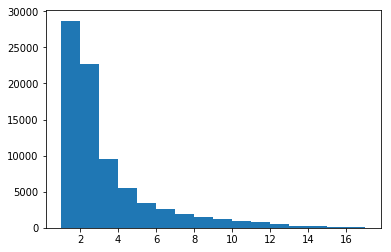

In [54]:
plt.hist(min_nmem_lst, bins=np.arange(1, max(min_nmem_lst)))

In [40]:
itos = ['a','b','c']
a = [1,0,2]

In [45]:
list(map(lambda x: itos[x], a))

['b', 'a', 'c']